# Introduction

At one point or another, all of us have gone through the experience of ordering multiple brands of shoes, two sizes each, expecting them to come in the next day or two, only to keep one pair and return the rest. This level of convenience we as customers expect combined with the explosion in retailers adopting omnichannel fulfillment strategies has generated significant demand for warehouse automation. Then came COVID-19, triggering an unprecedented explosion in the need for scalable and flexible automation to solve for the exponential increase in consumer demand and labor shortage.

I’ve been on the frontlines of this within verticals such as grocery, general merchandise, apparel, food & beverage to name a few. Through my work in architecting solutions such as dark-store/microfulfillment technology for enabling buy-online-pick-up-in-store (BOPIS), to solutioning two million square foot distribution centers using order picking robots, storage and retrieval systems, and miles of conveyor, I have been exposed to critical weaknesses in our solutions. One of such weakness has been the lack of data collection in order to actively optimize the operations to help customers be more flexible and proactive. 

*Concept BOPIS operation enabled by, Autostore, a high density storage system driven by robotic storage and retrieval.* 
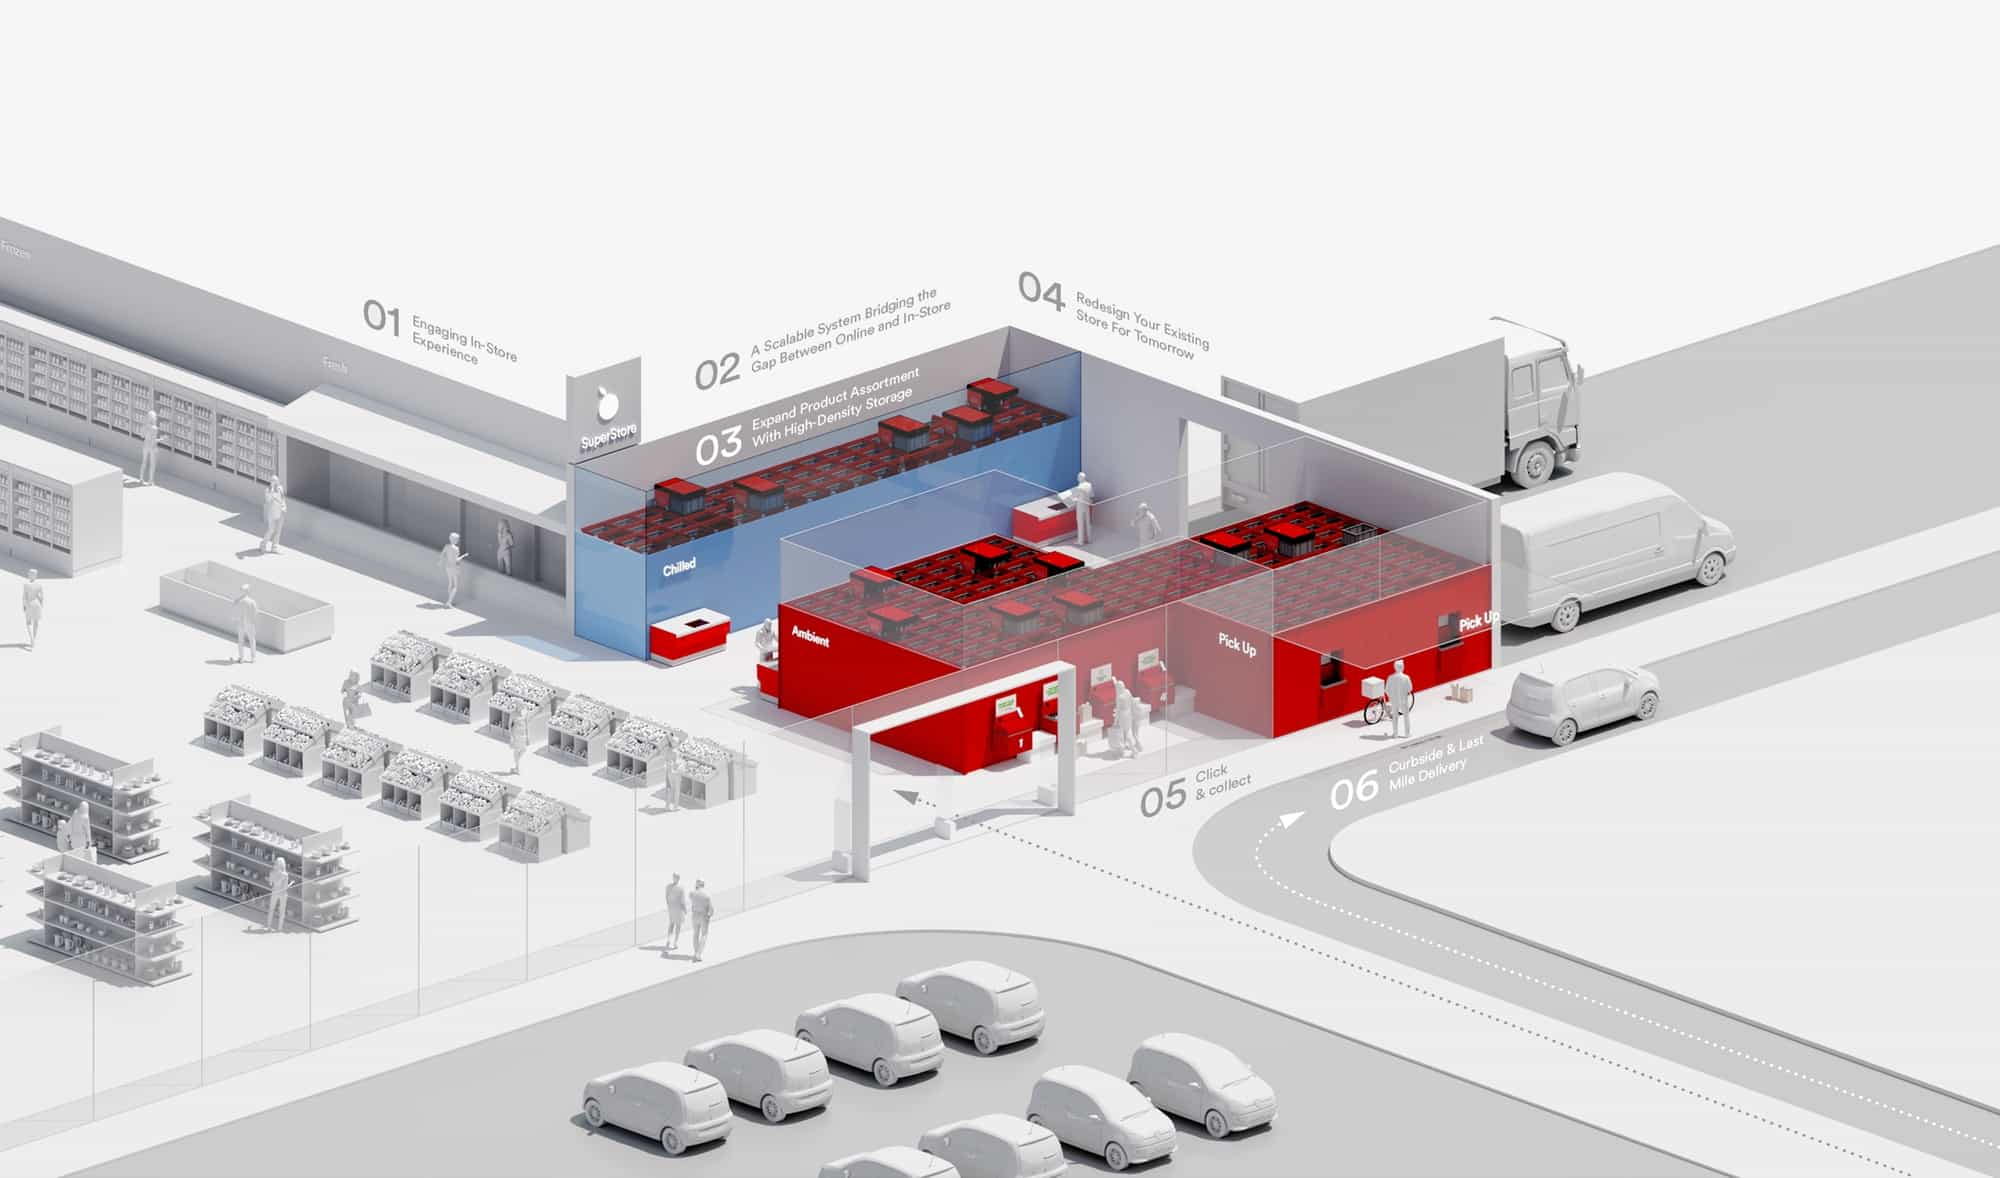
*Source: https://www.autostoresystem.com/industries/grocery*


There are countless opportunites for operations optimization given the level of data a distribution process generates. Data from mechatronic systems, operators, warehouse ERP systems, and many other subsystems generate enough data points to perform the analysis necessary. In this study the focus is on developing a methodology to predict downtime and failure of robotics systems to allow operators to be more proactive rather than reactive.

## Business Case

Before evaluating the data and potentially undertaking the product development process, the business case should be evaluated based on the costs and benefits as well as the alternative options. A decision tree is built based on high level estimates of potential revenue that can be generated from having a predictive maintenance feature in the warehouse analytics software platform. This is weighed against the current state of contracting out a resident maintenance operator who has the technology expertise to anticipate and fix breakdowns. 

### Decision Tree 
The following assumption underly the decision tree model. Given the low development time and ease of access to data, the R&D cost estimated to be around 70,000 dollars incurred mainly in developer and test hours. Since the feature is simpler to develop the probability of success is a high 80%. On the other hand a fully burdened resident maintance cost could be around 250,000 dollars per contract. For large complex projects a resident maintance person is required so this is the scenario modeled, however, the customer can choose either 6 months or 1 year contract with the probability of 20% and 80% respectively. 

On the other hand the company can expect an additional revenue of 250,000 dollars from the lifetime of the software license which includes the predictive maintenance feature. The joint the software succeeding and the probability of customer purchasing the add-in is 80%. In both the resident maintenance and software use scenarios, there is the option to give both services for free to generate customer goodwill to secure potential future cash flows. However, this is a riskier option because the customer can always choose to go with a competitor for upgrades in the future; therefore, the probability of revenue from upgrades is kept at 20%. 

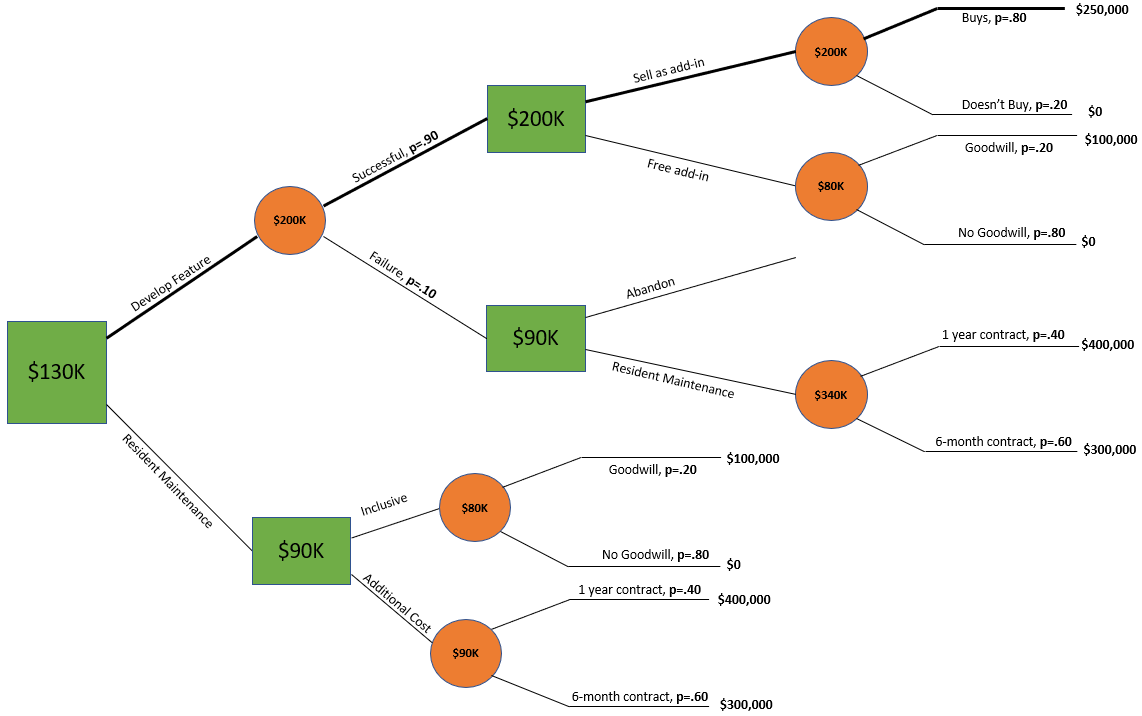


As observed in the decision tree, there is a business case for developing the software feature. With the aformentioned costs, revenue, and probabilities of outcomes, the company can expect an expected monetary value of 130,000 dollars from developing a predictive maintenance feature as an add in to the warheouse analytics software platform. In regards to senstivity analysis, the R&D succcess probabilities should be assessed since it can have a major impact on the decision. 

# Data Description and Exploration

### Background
Predictive maintenance datasets are generally difficult to obtain and in particular difficult to publish. Client confedentiality issues and data fidelity make it publishing such data sets particularly difficult in a smaller timeframe. However, synthetic data that mimics production data can be generated to train models, which can be tested on production data when its conducive to do so. All data used in this study is synthetically generated. 

The source of the data is: Stephan Matzka, School of Engineering - Technology and Life, Hochschule fur Technik und Wirtschaft Berlin, 12459 Berlin, Germany, stephan.matzka '@' htw-berlin.de via UCI Machine Learning Repository. 

*Link: https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset*

### Data Description

In [78]:
import pandas as pd 
import os as os
import matplotlib.pyplot as plt
import seaborn as sns

# Set and check current directory for reading and writing files. Change via os.chrdir()
path = os.getcwd()
# print(path)

# Import data and check features. 
df = pd.read_csv('ai4i2020.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

##### The dataset consists of 10,000 data points stored as rows with 14 features in columns
1. **UID**: Unique identifier ranging from 1 to 10000
2. **Product ID**: Consists of a letter L, M, or H for low, medium, and high as product quality variants.
3. **Air temperature [K]**: Operational air temperature in Kelvins. 
4. **Process temperature [K]**: Overall process temperature in Kelvins.
5. **Rotational speed [rpm]**: Rotational speed of tool. 
6. **Torque [Nm]**: Torque of tool. 
7. **Tool wear [min]**: Tool wear measured in minutes. 
8. **Machine failure**: Indicates, whether the machine has failed in this particular datapoint for any of the below failure modes are true.


##### The machine failure consists of five independent failure modes:
9. **Tool wear failure (TWF)**: Failure due to tool wear.
10. **Heat dissipation failure (HDF)**: Process failure due to heat dissipation. 
11. **Power failure (PWF)**: Failure due to power being surged too low. 
12. **Overstrain failure (OSF)**: Failure to due excessive torque.
13. **Random failures (RNF)**: Random failure.

If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1.


### Exploratory Data Analysis


It is critical to understand the high level shape and distribution of the data because it will help inform any idiosyncracies that may be encountered during model building. Below is the percentile levels, means, min and max, and standard deviations of critical variables. 

In [5]:
df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']].describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000
std,2.000259,1.483734,179.284096,9.968934,63.654147
min,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000


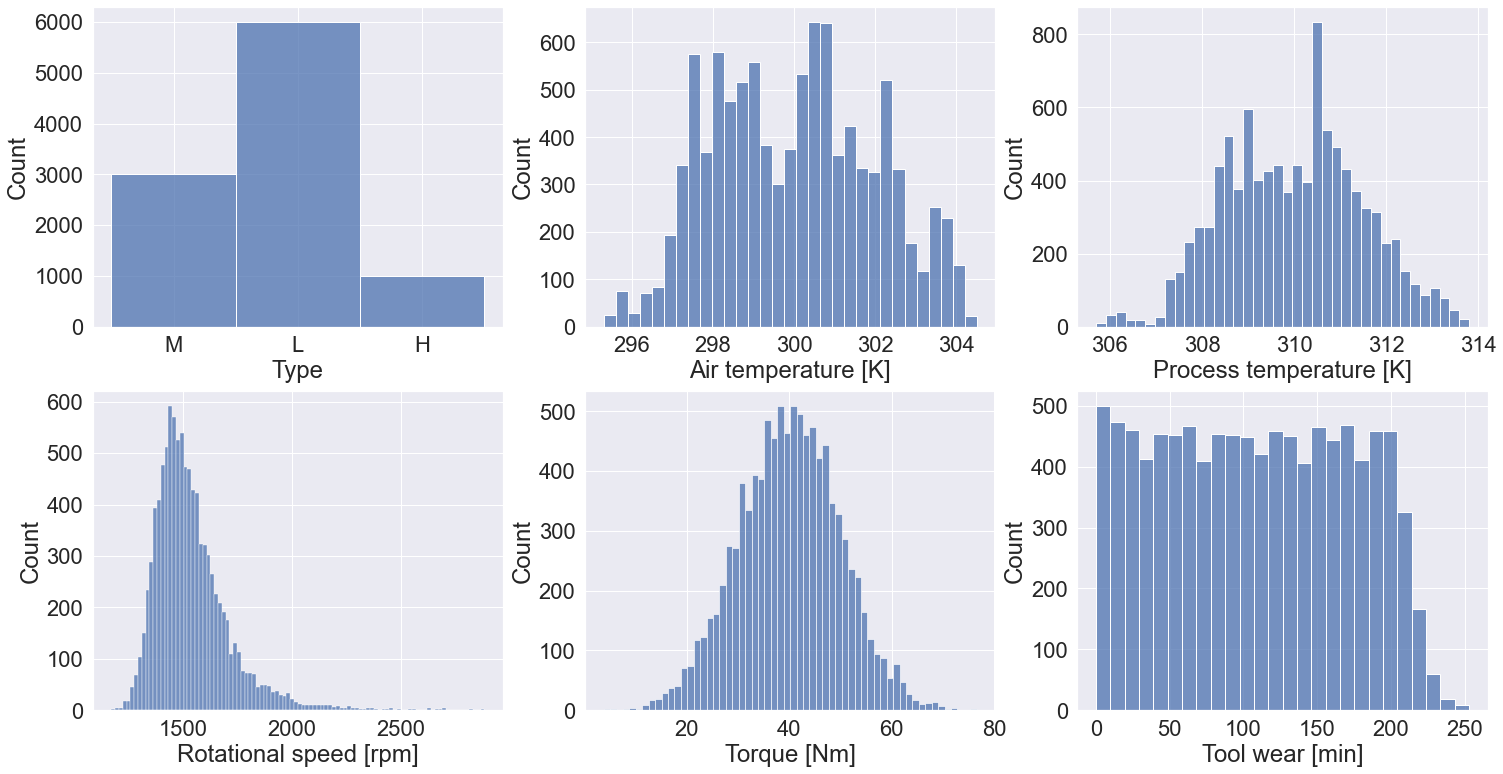

In [2]:
df_vis = df.drop(columns=['UDI','Product ID','TWF','HDF','PWF','OSF','RNF', 'Machine failure'])
plt.figure(figsize=(25,20))
sns.set(font_scale=2)
for n, columns in enumerate(df_vis.columns, 1):
    plt.subplot(3, 3, n)
    sns.histplot(df[columns])


From the above pairplot it is evident that air temperature is roughly normaly distributed with a mean around 300 K. Process temperature is also normally spread. Rotational speed is skewed to left with seemingly normally distributed noise. Torque is also normally distributed with central tendency around 40 nm. Lastly tool wear seems uniformaly distributed. In regards to the product types, 50% of all products consist of low quality products, 30% medium, and 20% high. 

# Probability Calculations and Confidence Intervals

Since the data is a synthetic data sample captured to make assumptions about the true population, it is critical to calculate the confidence intervals. This is so that we can know how far away our away the sample mean is form the actual population mean. The confidence interval provides the upper and lower limit around the sample mean. In this case the interval used is 95% to test to see if we can be confident that we captured population mean within this interval.

The random variable in question is machine failure, since this is a binomial distribution, it must be approximated as a normal distribution by defining the approximated mean and standard deviation as follows: 
$$μ=np$$ and $$σ=\sqrt{np(1−p)}$$

Machine failure was picked to build the confidence interval because it is the target variable. It is important understand how well the sample of failures captures the population within the 95% interval.

In [7]:
n = len(df)
p = len(df[df['Machine failure'] == 1]) / n

# Create functions for re-use 

# Calculate approximated mean 
def mean(n, p):
    mu = n*p
    return mu 

print(f'Mean = {mean(n, p)}')

# Calculate approximated standard deviation
def standard_deviation(n, p):
    std = (n*p*(1-p))**(1/2)
    return std

print(f'Standard Deviation = {standard_deviation(n, p)}')


Mean = 339.0
Standard Deviation = 18.097179338228376


Given mean and standard deviation, the binomial distribution can now be approximated to a normal distribution:

In [9]:
from scipy import stats
import numpy as np 
interval = stats.norm.interval(alpha=0.95, loc=mean(n, p), scale=standard_deviation(n, p))
print(f'95% Confidence Interval = {interval}')

95% Confidence Interval = (303.53018027531, 374.46981972469)


Visually:

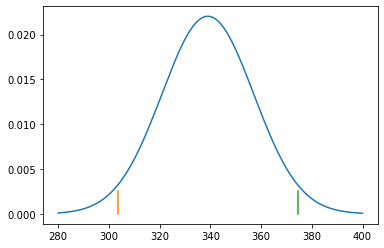

In [10]:
# Create a range to plot 
space = np.linspace(280, 400, 1000)
# Define probability density function 
dist_plot = stats.norm.pdf(space, mean(n, p), standard_deviation(n, p))

plt.plot(space, dist_plot)

# Show the interval points 
a, b = [interval[0], interval[0]], [0, .0025]
c, d = [interval[1], interval[1]], [0, .0025]

plt.plot(a, b, c, d)

The approximated normal distribution shows that expected numbers of failures can be captured between 304 and 374 failures centered around 339 failures. 

# Hypothesis Test

In production settings, mechatronics systems handle multiple types of products. Each of these products can have unique characteristics that can put various demands on the system. In this data set there are multiple products of different quality. A 3-way hypothesis test is used to see if there is a difference in the mean failures between the product types. 

In [108]:
# Since machine failure is binomial, failures associated with product type should be approximated to a normal distribution 

high = df[df['Type'] == 'H']
medium = df[df['Type'] == 'M']
low = df[df['Type'] == 'L']

# Find n and p for each product types

# For High Quality 
n_high = len(high)
p_high = len(high[high['Machine failure'] == 1]) / n_high

# For Medium Quality 
n_med = len(medium)
p_med = len(medium[medium['Machine failure'] == 1]) / n_med

# For Low Quality 
n_low = len(low)
p_low = len(low[low['Machine failure'] == 1]) / n_low

# Approximated mean and standard deviation for all product quality types  
mu_high = mean(n_high, p_high)
std_high = standard_deviation(n_high, p_high)
mu_med = mean(n_med, p_med)
std_med = standard_deviation(n_med, p_med)
mu_low = mean(n_low, p_low)
std_low = standard_deviation(n_low, p_low)

print(
    f'Mean for high quality products = {mu_high}', '\n', 
    f'Standard deviation for high quality products = {std_high}', '\n',
    f'Mean for medium quality products = {mu_med}', '\n', 
    f'Standard deviation for high quality products = {std_med}', '\n',
    f'Mean for low quality products = {mu_low}', '\n', 
    f'Standard deviation for low quality products = {std_low}', '\n', 
)

# Approximated normal distribution 
# Seed for reproducability 
np.random.seed(42069)

# Extract normal approximations 
high = stats.norm.rvs(loc=mu_high, scale=std_high, size=n_high)
medium = stats.norm.rvs(loc=mu_med, scale=std_med, size=n_med)
low = stats.norm.rvs(loc=mu_low, scale=std_low, size=n_low)

Mean for high quality products = 21.0 
 Standard deviation for high quality products = 4.534348800309851 
 Mean for medium quality products = 83.0 
 Standard deviation for high quality products = 8.98339401533192 
 Mean for low quality products = 235.00000000000003 
 Standard deviation for low quality products = 15.026504361738073 



Since there are 3 different product quality types, it is best to use a 3 way ANOVA test with the followig null and alternate hypothesis:
$$H_0 = \text{There is no signficant difference between failures associated with product quality}$$
$$H_1 = \text{There is a difference between failures associated with product quality}$$


In [109]:
f_statistic, p_value = stats.f_oneway(high, medium, low)

print(f'f-statistic = {f_statistic}', '\n',
      f'p-value = {p_value}')

f-statistic = 222531.35760183513 
 p-value = 0.0


The p value is esssentially zero, that too with an extremely high f-statistic, meaning that is a significant difference between the distributions of machine failures associated with product quality. This can inform the operations team to anticipate frequency of machine failures to increase if they expect to process many low quality products during a given operational timeframe. The below plot drives this point home:

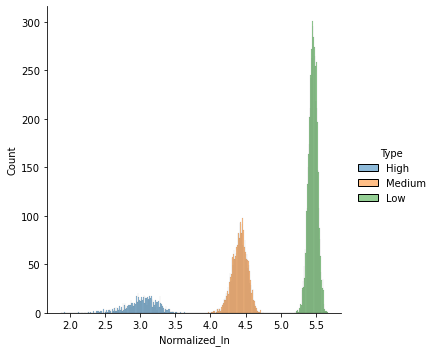

In [112]:
high = pd.DataFrame(high, columns=['Normalized'])
high['Type'] = 'High'
medium = pd.DataFrame(medium, columns=['Normalized'])
medium['Type'] = 'Medium'
low = pd.DataFrame(low, columns=['Normalized'])
low['Type'] = 'Low'

df_approx = pd.concat([high, medium, low], ignore_index=True)

# Perform log transform to ease visuals 

df_approx['Normalized_ln'] = np.log(df_approx['Normalized'])

# Visualize 
sns.displot(data=df_approx, x='Normalized_ln', hue='Type', bins=500)

# Regression Models

Regression models are critical for understanding the relationship between the independent varables in the data set machine failure. The regression models below will form the basis of the predictive maintenance feature planned for the warehouse analytics software. 

**Problem statement: Predict machine failure based on the given explanatory variables to inform operations staff to effectively identify root cause, deploy resources, develop contigency plans, and minimize downtime.**

### Classification vs Regression

There are two approaches taken to build the model: Regression and Classification. Regression is best to predict a continious quantity while classificaiton is best for predicting descrete class labels, such as success or failure. 

A linear regression model will be used to assume process temperature, rotational speeed, torque, and tool wear as the explanatory variables. Most importantly these variables are signals of machine failures and the goal with the linear regression is to predict failure based on the right mix of the aforementioned signals.

A logistic regression model will be used for classification to predict when a machine would fail based on the same explantory variables.

#### Linear Regression 
The initial model will be based on the temperature signals because the heat dissipation failure (HDF) has the highest count.

In [5]:
failure_types = df[df['Machine failure'] == 1][['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].apply(pd.value_counts)
print(failure_types.head())

   TWF  HDF  PWF  OSF  RNF
0  293  224  244  241  338
1   46  115   95   98    1


#### Single Variable Linear Regression

<AxesSubplot:xlabel='Air temperature [K]', ylabel='Process temperature [K]'>

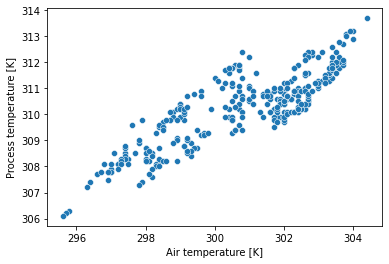

In [31]:
# Visualize 
single_var = df[df['Machine failure'] == 1]

single_var = single_var[['Process temperature [K]', 'Air temperature [K]']]

sns.scatterplot(y = 'Process temperature [K]',
            x = 'Air temperature [K]', 
            data=single_var)

In [32]:
# Build linear regression model 
from sklearn import linear_model

X_single_var = single_var[['Air temperature [K]']]
Y_single_var = single_var[['Process temperature [K]']]
model_single_var = linear_model.LinearRegression()
model_single_var.fit(X_single_var, Y_single_var)

# Find the coefficients and y-intercept 
print(
    f'Coefficient = {model_single_var.coef_}', '\n',
    f'Intercept = {model_single_var.intercept_}', '\n',
)

Coefficient = [[0.55869341]] 
 Intercept = [142.18699981] 



<AxesSubplot:xlabel='Air temperature [K]', ylabel='Predicted Process temperature [K]'>

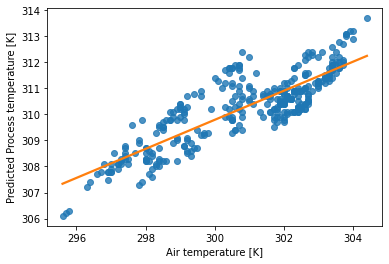

In [43]:
# Visualize 
predictions_single_var = model_single_var.predict(X_single_var)
predictions_single_var = pd.DataFrame(predictions_single_var, index=X_single_var.index)
predictions_single_var = pd.concat([X_single_var, predictions_single_var], axis=1)

predictions_single_var = predictions_single_var.rename(columns={0: 'Predicted Process temperature [K]'})

fig, ax = plt.subplots()
sns.regplot(x=X_single_var, y=Y_single_var, fit_reg=False, ax=ax);
sns.regplot(x=X_single_var, y=predictions_single_var['Predicted Process temperature [K]'], 
            scatter=False, ax=ax)

<AxesSubplot:xlabel='Process temperature [K]', ylabel='Predicted Process temperature [K]'>

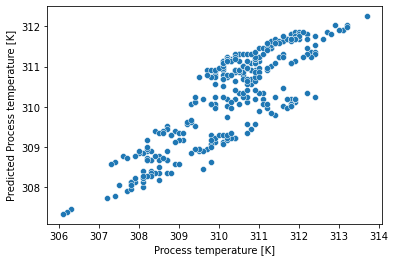

In [45]:
# Plot the Residual vs Predicted 
rvp = pd.merge(single_var, predictions_single_var, left_index=True, right_index=True)

sns.scatterplot(y = 'Predicted Process temperature [K]',
            x = 'Process temperature [K]', 
            data=rvp)

#### Insights

The slope of the regression line is given by the coefficient and measures the degree of change per unit change in the explanatory variable, in this case it is .559. The Y intercept of the fitted model is 142.17. 

As observed in the above plot, there isn't a non-linear pattern in the plot betwen residuals versus predicted. Finally the response variables can be labeled as is because there isn't a huge discrepency between the temperatures. 



#### Multiple Variable Linear Regression

In the multiple variable regression, all explantory variable, that is signals of failure will be evaluated for predicting the combination of signals that can result in a failure. Due to HDF failure being the highest, process temperature is selected to tbe the response variable with rotational speed, torque, and tool wear being explanatory. 

In [73]:
multi_var = df[df['Machine failure'] == 1]

multi_var = multi_var[['Process temperature [K]', 
                       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]

In [74]:
# Check to see if there are any multicolinearity issues 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Signal'] = multi_var.columns
vif['VIF'] = [variance_inflation_factor(multi_var.values, i)
                          for i in range(len(multi_var.columns))]

print(vif)

                    Signal         VIF
0  Process temperature [K]  232.573468
1   Rotational speed [rpm]   75.233999
2              Torque [Nm]   48.117099
3          Tool wear [min]    5.258151


All of the signals have VIF issues, so different combination should be picked.

In [72]:
multi_var = df[df['Machine failure'] == 1]

multi_var = multi_var[['Torque [Nm]', 'Rotational speed [rpm]', 'Tool wear [min]']]
vif = pd.DataFrame()
vif['Signal'] = multi_var.columns
vif['VIF'] = [variance_inflation_factor(multi_var.values, i)
                          for i in range(len(multi_var.columns))]

print(vif)

                   Signal       VIF
0             Torque [Nm]  4.526754
1  Rotational speed [rpm]  4.713721
2         Tool wear [min]  4.504750


VIF issues now fixed with the selected combination of signals. 

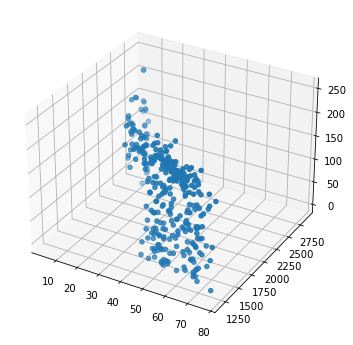

In [89]:
# Visualize 
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')

x = multi_var['Torque [Nm]']
y = multi_var['Rotational speed [rpm]']
z = multi_var['Tool wear [min]']

ax.scatter(x, y, z)
plt.show()

Above plot shows that there is no need for logistic scaling. 

In [82]:
# Create final model 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

multi_var = df[df['Machine failure'] == 1]
multi_var = multi_var[['Torque [Nm]', 'Rotational speed [rpm]', 'Tool wear [min]', 'Process temperature [K]']]
X = multi_var.drop('Process temperature [K]', axis=1)
Y = multi_var[['Process temperature [K]']]


# Assume that 80% of the data will be used to train the model and the 20% to test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Build model
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

#Check trained predictions
response_predictions = model.predict(X_train)

# Find statistics 
print(
    f'Coefficient = {model.coef_}', '\n',
    f'Intercept = {model.intercept_}', '\n',
)

print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_train, response_predictions))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, response_predictions))


Coefficient = [[-0.03100026 -0.00122285 -0.00307054]] 
 Intercept = [314.11772349] 

Mean squared error (MSE): 1.74
Coefficient of determination (R^2): 0.04


The MSE low and R-squared values are very low. This means that the model has a low error when predicting the response variable but there is very little correlation between the explantory signals and the process temperature where failures occured. The same performance level must be checked against the test set:

In [85]:
response_predictions_test = model.predict(X_test)

# Find statistics 
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, response_predictions_test))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, response_predictions_test))

Mean squared error (MSE): 2.02
Coefficient of determination (R^2): -0.02


The MSE is once again low, however, R-squared value is negative. This means that the model has a low error when predicting the response variable but there is very little correlation between the explantory signals and the process temperature where failures occured. Moreover, having a negative R-squared indicates that the predictions will get continually worse. 

#### Classification: Logistic Regression 


In [137]:
# Check for VIF 
log_reg = df[['Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
vif = pd.DataFrame()
vif['Signal'] = log_reg.columns
vif['VIF'] = [variance_inflation_factor(log_reg.values, i)
                          for i in range(len(log_reg.columns))]
print(vif)

                    Signal         VIF
0  Process temperature [K]  637.201168
1   Rotational speed [rpm]  315.265397
2              Torque [Nm]   72.099354
3          Tool wear [min]    3.877124


There is high multicolinearity for all variables. However the VIF will be ignored in this case because the we only care about the prediction and not the explanatory strength of each of the of the parameters above. 

In [177]:
from sklearn.metrics import accuracy_score
X = log_reg
Y = df[['Machine failure']]

# Build model but make sure to balance the data set because there are only 339 failures out of 10,000
model = linear_model.LogisticRegression(class_weight = 'balanced')
model.fit(X, Y)

#Check trained predictions
response_predictions = model.predict(X)

# Accuracy Score 
accuracy_score(Y, response_predictions)


C:\Users\adiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7986

The logistic regression model predicts both machine failures and when its is operational with a with 79.86% accuracy. Accuracy is defined as correct predictions to total number of predictions. Further metrics:

In [178]:
from sklearn.metrics import classification_report

target_names = ['Operational', 'Machine Failure']
print(classification_report(Y, response_predictions, target_names=target_names))

                 precision    recall  f1-score   support

    Operational       0.99      0.80      0.88      9661
Machine Failure       0.11      0.73      0.20       339

       accuracy                           0.80     10000
      macro avg       0.55      0.77      0.54     10000
   weighted avg       0.96      0.80      0.86     10000



Precision is the percentage of correct positive predictions relative to total positive predictions. 
Recall is the percentage of correct positive predictions relative to total actual positives.
F1 score looks into the false positive, true positives, false negatives, and true negatives and calculated an "accuracy" level.

# Recommendation

Revisiting the model results above:

Precision: Out of all the events that the model predicted would be fail, only 11% actually did.

Recall: Out of all the events that actually did fail, the model only predicted this outcome correctly for 73% of those events.

F1: F1 score is low and is closer to 0 than it is to 1. 

**Based on the above metrics, the recommendation is that company not use logistic regression model as the basis of the prediction feature for the warehouse analytics software.** 

Other machine learning algorithms such Naive Bayes, K-Nearest Neighbors, and Support Vector Machines need to be evaluated. From this evaluation the best model can be deployed as the basis of the predictive analytics feature. 